# Imports

In [1]:
import numpy as np
from fastnirnet import FastNIRNet, config

import matplotlib.pyplot as plt
import seaborn as sns

# Set the number of CPU cores

In [2]:
config(jobs=6)

# Synthetize spectra

In [3]:
net = FastNIRNet("large")

# teff, logg, mh, am, vmic, vsini, doppler shift
x = np.array([5550, 3.1, 0.2, 0.17, 1.2, 10, -20])

spectrum = net.synthetize_spectra(x)
print(spectrum.shape)

No GPU detected, using CPU.
(1, 9480)


## Plot synthetic spectra

<Axes: >

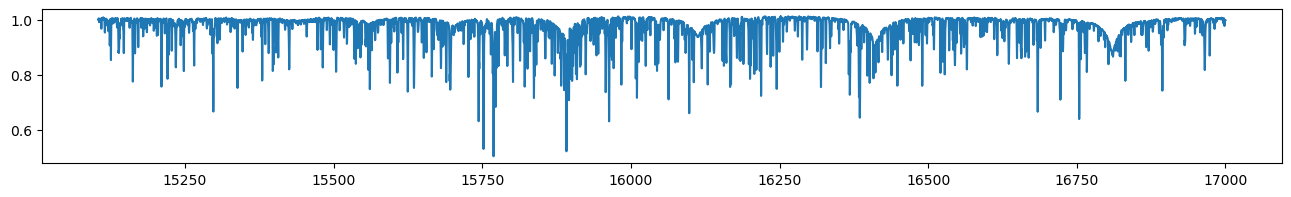

In [4]:
plt.figure(figsize=(16, 2))
sns.lineplot(x=net.get_wavelength(), y=spectrum[0], legend=False)

# Inversion

In [5]:
solution, inv_spectra, fitness = net.inversion(spectrum, n_particles=4096, iters=10, verbose=1)

----- Start PSO -----
----------------------------
Iteration: 1   Best Fitness: 0.0006676009867238252
----------------------------
Iteration: 2   Best Fitness: 0.00026618963379635785
----------------------------
Iteration: 3   Best Fitness: 9.966419229768477e-05
----------------------------
Iteration: 4   Best Fitness: 6.156689722242128e-05
----------------------------
Iteration: 5   Best Fitness: 6.0798530088060364e-05
----------------------------
Iteration: 6   Best Fitness: 5.8647501535008154e-05
----------------------------
Iteration: 7   Best Fitness: 5.094048927898072e-05
----------------------------
Iteration: 8   Best Fitness: 4.713212611418548e-05
----------------------------
Iteration: 9   Best Fitness: 2.5135446105669812e-05
----------------------------
Iteration: 10   Best Fitness: 1.306640560702276e-05
----- End PSO -----
Best Fitness: 1.306640560702276e-05

|     Teff |   Logg |    M/H |     AM |   Vmic |    Vsini |  Doppler |
|  5614.38 |   3.35 |   0.19 |   0.19 |   1.6

<Axes: >

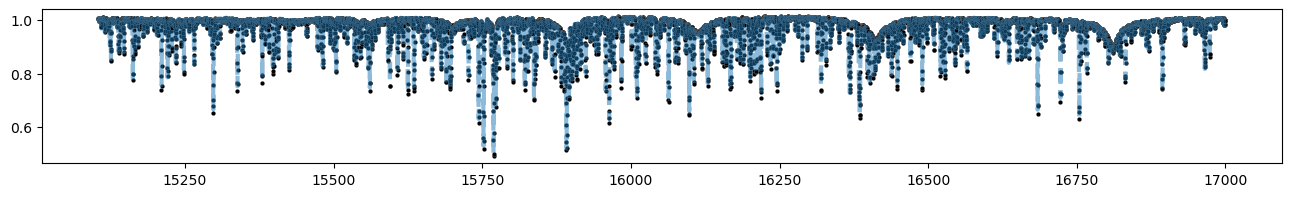

In [6]:
plt.figure(figsize=(16, 2))
sns.lineplot(x=net.get_wavelength(), y=spectrum[0], legend=False, linewidth=3, linestyle='--', alpha=0.5)
sns.scatterplot(x=net.get_wavelength(), y=inv_spectra, s=10, linewidth=0.1, color='black')

# Make new objective function

In [7]:
from sklearn.metrics import mean_absolute_error
def obj(y_true, y_pred):
    return mean_absolute_error(y_true.T, y_pred.T, multioutput='raw_values')

In [8]:
solution, inv_spectra, fitness = net.inversion(spectrum, n_particles=4096, iters=10, verbose=1, objective_function=obj)

----- Start PSO -----
----------------------------
Iteration: 1   Best Fitness: 0.019465679015911338
----------------------------
Iteration: 2   Best Fitness: 0.01692616774421322
----------------------------
Iteration: 3   Best Fitness: 0.007115814013933798
----------------------------
Iteration: 4   Best Fitness: 0.005896079828415936
----------------------------
Iteration: 5   Best Fitness: 0.005356939932802236
----------------------------
Iteration: 6   Best Fitness: 0.003911785279505126
----------------------------
Iteration: 7   Best Fitness: 0.003813027112499736
----------------------------
Iteration: 8   Best Fitness: 0.0035579157034268416
----------------------------
Iteration: 9   Best Fitness: 0.002848330289745476
----------------------------
Iteration: 10   Best Fitness: 0.0026330663312007564
----- End PSO -----
Best Fitness: 0.0026330663312007564

|     Teff |   Logg |    M/H |     AM |   Vmic |    Vsini |  Doppler |
|  5880.80 |   3.47 |   0.35 |   0.11 |   1.36 |     9.93 

<Axes: >

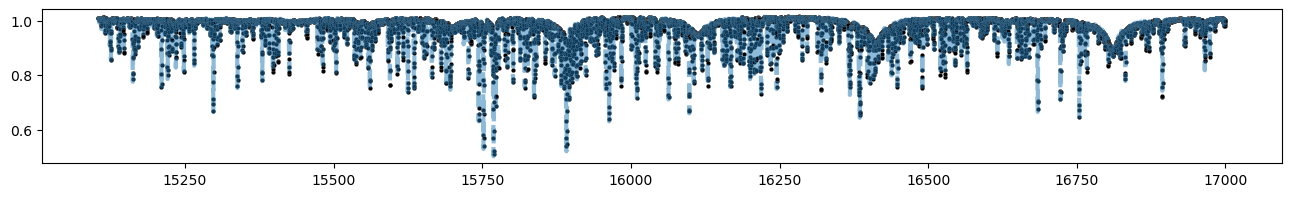

In [9]:
plt.figure(figsize=(16, 2))
sns.lineplot(x=net.get_wavelength(), y=spectrum[0], legend=False, linewidth=3, linestyle='--', alpha=0.5)
sns.scatterplot(x=net.get_wavelength(), y=inv_spectra, s=10, linewidth=0.1, color='black')

# Inversion with fixed parameters

In [10]:
solution, inv_spectra, fitness = net.inversion(spectrum, n_particles=4096, iters=10, fixed_logg=3.12, fixed_vsini=9.8, verbose=1)

----- Start PSO -----
----------------------------
Iteration: 1   Best Fitness: 0.00011780258463000147
----------------------------
Iteration: 2   Best Fitness: 6.86078283038107e-05
----------------------------
Iteration: 3   Best Fitness: 1.9468105143103073e-05
----------------------------
Iteration: 4   Best Fitness: 1.7078274335868612e-05
----------------------------
Iteration: 5   Best Fitness: 1.7078274335868612e-05
----------------------------
Iteration: 6   Best Fitness: 1.5986500488035458e-05
----------------------------
Iteration: 7   Best Fitness: 1.3072326568604964e-05
----------------------------
Iteration: 8   Best Fitness: 1.0060747793577559e-05
----------------------------
Iteration: 9   Best Fitness: 1.0060747793577559e-05
----------------------------
Iteration: 10   Best Fitness: 1.0060747793577559e-05
----- End PSO -----
Best Fitness: 1.0060747793577559e-05

|     Teff |   Logg |    M/H |     AM |   Vmic |    Vsini |  Doppler |
|  5568.09 |   3.12 |   0.26 |   0.06 | 

<Axes: >

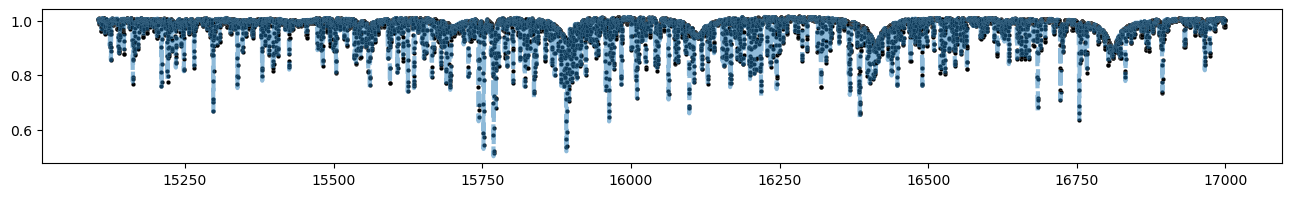

In [11]:
plt.figure(figsize=(16, 2))
sns.lineplot(x=net.get_wavelength(), y=spectrum[0], legend=False, linewidth=3, linestyle='--', alpha=0.5)
sns.scatterplot(x=net.get_wavelength(), y=inv_spectra, s=10, linewidth=0.1, color='black')

# Inversion with range in params (teff,logg,mh,am,vmic,vsini,doppler)

In [12]:
solution, inv_spectra, fitness = net.inversion(spectrum, n_particles=4096, iters=10, teff_range=(4000,6000), vsini_range=(5,20), verbose=1)

----- Start PSO -----
----------------------------
Iteration: 1   Best Fitness: 0.0002883990744104063
----------------------------
Iteration: 2   Best Fitness: 0.00010452816130866539
----------------------------
Iteration: 3   Best Fitness: 7.711457331259937e-05
----------------------------
Iteration: 4   Best Fitness: 5.8873850585952716e-05
----------------------------
Iteration: 5   Best Fitness: 5.466820245531137e-05
----------------------------
Iteration: 6   Best Fitness: 4.9190651050794366e-05
----------------------------
Iteration: 7   Best Fitness: 4.638139151924316e-05
----------------------------
Iteration: 8   Best Fitness: 4.3536187414026224e-05
----------------------------
Iteration: 9   Best Fitness: 4.3529751242553316e-05
----------------------------
Iteration: 10   Best Fitness: 4.1476915762243964e-05
----- End PSO -----
Best Fitness: 4.1476915762243964e-05

|     Teff |   Logg |    M/H |     AM |   Vmic |    Vsini |  Doppler |
|  5667.65 |   3.17 |   0.07 |   0.31 |   

<Axes: >

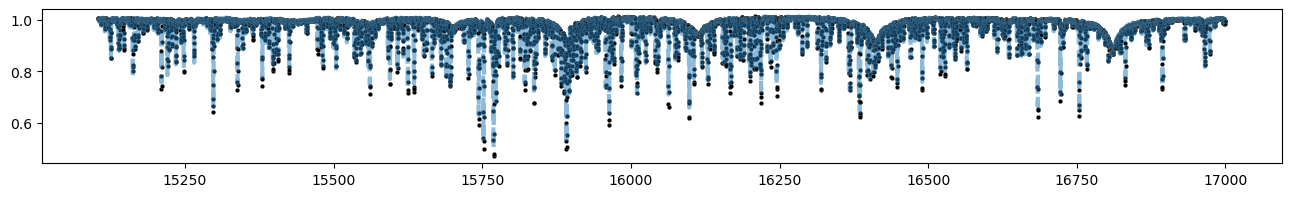

In [13]:
plt.figure(figsize=(16, 2))
sns.lineplot(x=net.get_wavelength(), y=spectrum[0], legend=False, linewidth=3, linestyle='--', alpha=0.5)
sns.scatterplot(x=net.get_wavelength(), y=inv_spectra, s=10, linewidth=0.1, color='black')

# Inversion with observed spectra

Need provide the flux and wavelength, the code interpolate the flux to the steps in wavelength to match with the synthetizer and determine the regions to compare by the parameter tol (tolerance of gap between 2 wavelength points)

In [14]:
data = np.genfromtxt('example_observed_spectra.txt')
wl = data[:, 0]
flux = data[:, 1]

In [15]:
solution, inv_spectra, fitness = net.inversion(flux, wl, n_particles=8192, iters=20, tol=0.1, verbose=0)

Best Fitness: 0.0009612724999330559

|     Teff |   Logg |    M/H |     AM |   Vmic |    Vsini |  Doppler |
|  4891.17 |   4.30 |   0.14 |   0.12 |   2.43 |    23.15 |   -79.11 |
              


<Axes: >

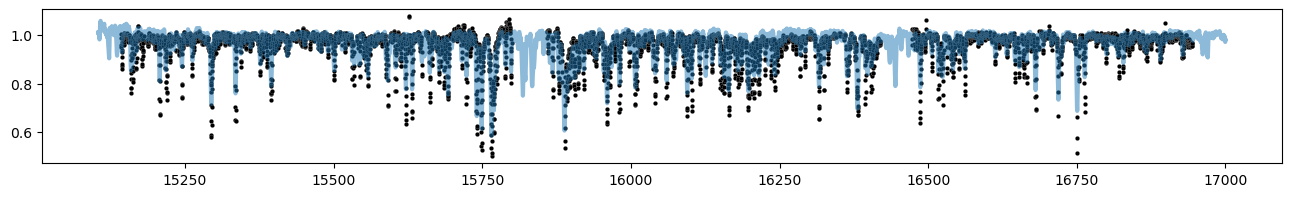

In [18]:
plt.figure(figsize=(16,2))
sns.lineplot(x=net.get_wavelength(), y=inv_spectra, legend=False, linewidth=3, linestyle='-', alpha=0.5)
sns.scatterplot(x=wl, y=flux, s=10, linewidth=0.1, color='black')